## Demonstrating Moore's Law in Code

* Linear regression can be used on problems that don't necessarily seem linear at first

* It is a great first line of attack to discover correlations in data

Moore's Law:

Transistor count on integrated circuits doubles every 2 years

the word 'doubles' gives us a hint that there is an exponential relationship 

the trick is not to measure transistor counts directly, we will measure the log of transistor counts

tc = Transistor Count


$$ln(tc) = a*year +b$$

<br />

$$e^{ln(tc)} = e^{a * year +b}$$

<br />

$$2tc = 2 * e^{a * year} * e^b$$

<br />

$$2tc = e^{a * year + ln(2)} * e^b$$

<br />

$$a * year2 = a * year1 + ln(2)$$

<br />

$$year2 = year1 + \frac{ln(2)}{a}$$

<br />

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

X = []
Y = []

In [10]:
non_decimal = re.compile(r'[^\d]+')

In [11]:
for line in open('data/moore.csv'):
    r = line.split('\t')

    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    X.append(x)
    Y.append(y)
    

In [12]:
X = np.array(X)
Y = np.array(Y)

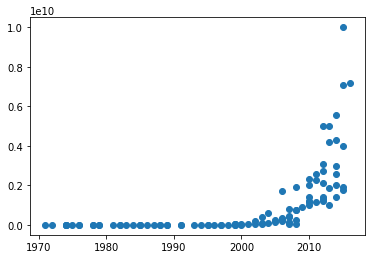

In [13]:
plt.scatter(X, Y)
plt.show()

In [14]:
Y = np.log(Y)

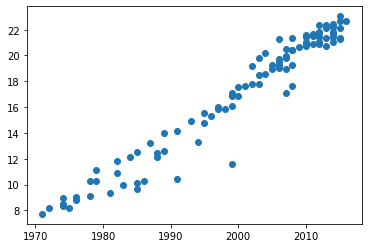

In [17]:
plt.scatter(X,Y)
plt.show()

In [29]:
N = len(X)

denominator = (N * X.dot(X)) - sum(X)**2

a_numerator = N * X.dot(Y) - sum(X)*sum(Y)
b_numerator = sum(Y)*X.dot(X) - sum(X)*X.dot(Y)

a = a_numerator / denominator
b = b_numerator / denominator

print('a: ', a, 'b: ', b)

a:  0.3510435733642831 b:  -685.000284380311


In [26]:
Yhat = a*X + b

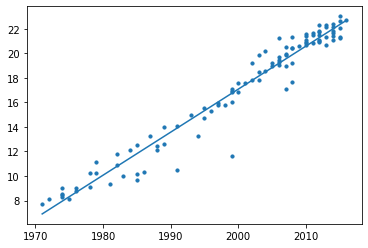

In [27]:
plt.scatter(X, Y, s=10)
plt.plot(X, Yhat)
plt.show()

In [31]:
SSres = sum((Y-Yhat)**2)
SStot = sum((Y-Y.mean())**2)
R2 = 1 - SSres/SStot
print('R-squared is: ', R2)

R-squared is:  0.9529442852285767


In [33]:
print('Time to double:', np.log(2)/a, 'years')

Time to double: 1.974533172383863 years
